In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import display

In [5]:
path = '../output/test/'
all_files = glob.glob(path + "/*.csv")
print(all_files)
dfs = [pd.read_csv(f) for f in all_files]
df = pd.concat(dfs, ignore_index=True)
display(df)
success_df = df[df['result'] == 'Success']
polocm_success_df = success_df[success_df['dod'] >0]


['../output/test/results_0.3.csv', '../output/test/results_0.1.csv', '../output/test/results_0.0.csv', '../output/test/results_0.2.csv']


,lo_id,dod,actual_dod,domain,index,num_objects,total_length,size,measurement,runtime,polocm_time,locm2_time,locm_time,accuracy,error_rate,executability,result
0,0,0.3,0.311111,floortile,0,40,10,1,flex,0.467349,0.443534,0.010647,0.013168,1.000000,0.000000,1.000,Success
1,1,0.3,0.311111,floortile,0,33,30,3,flex,0.669367,0.659668,0.002745,0.006954,1.000000,0.000000,1.000,Success
2,2,0.3,0.311111,floortile,0,30,50,5,flex,1.344651,1.313720,0.008235,0.022696,1.000000,0.000000,0.900,Success
3,3,0.3,0.313333,floortile,0,31,100,10,flex,3.118883,3.076387,0.014579,0.027917,1.000000,0.000000,0.420,Success
4,4,0.3,0.313302,floortile,0,28,248,25,flex,13.328007,13.095227,0.094562,0.138218,0.962778,0.013889,0.521,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,199,0.2,0.200404,transport,0,43,100,1,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.000000,0.000,Timeout: Could not complete polocm in 600 seco...
932,200,0.2,0.202481,transport,0,31,179,3,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.000000,0.000,Timeout: Could not complete polocm in 600 seco...
933,201,0.2,0.203537,transport,0,29,259,5,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.000000,0.000,Timeout: Could not complete polocm in 600 seco...
934,202,0.2,0.202422,transport,0,28,479,10,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.000000,0.000,Timeout: Could not complete polocm in 600 seco...


count    200.000000
mean     254.060000
std      197.400993
min       30.000000
25%      100.000000
50%      189.000000
75%      379.250000
max      890.000000
Name: total_length, dtype: float64

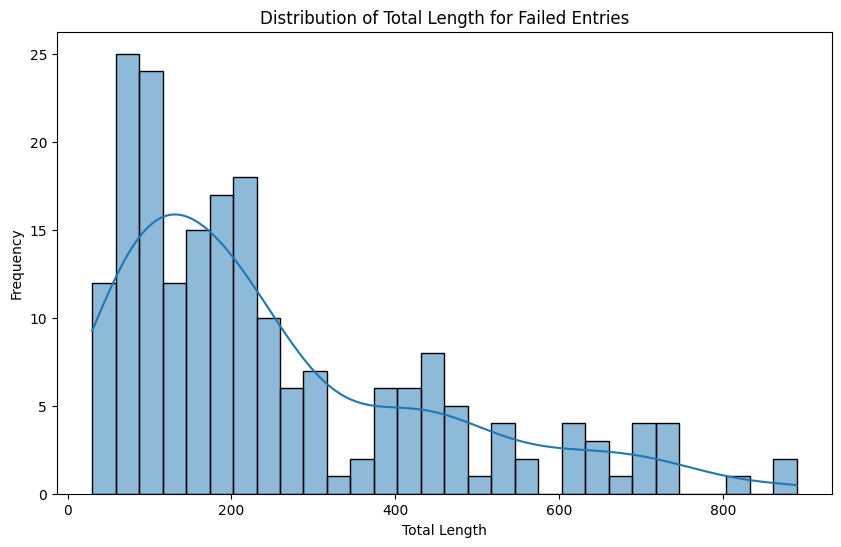

In [6]:
# Filter the DataFrame for failed results
failed_df = df[df['result'] != 'Success']

# Display descriptive statistics for total_length
display(failed_df['total_length'].describe())

# Plot the distribution of total_length for failed entries
plt.figure(figsize=(10, 6))
sns.histplot(failed_df['total_length'], bins=30, kde=True)
plt.title('Distribution of Total Length for Failed Entries')
plt.xlabel('Total Length')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_618335/2806246821.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index=pd.cut(df['total_length'], np.linspace(df['total_length'].min(), df['total_length'].max(), 10)),


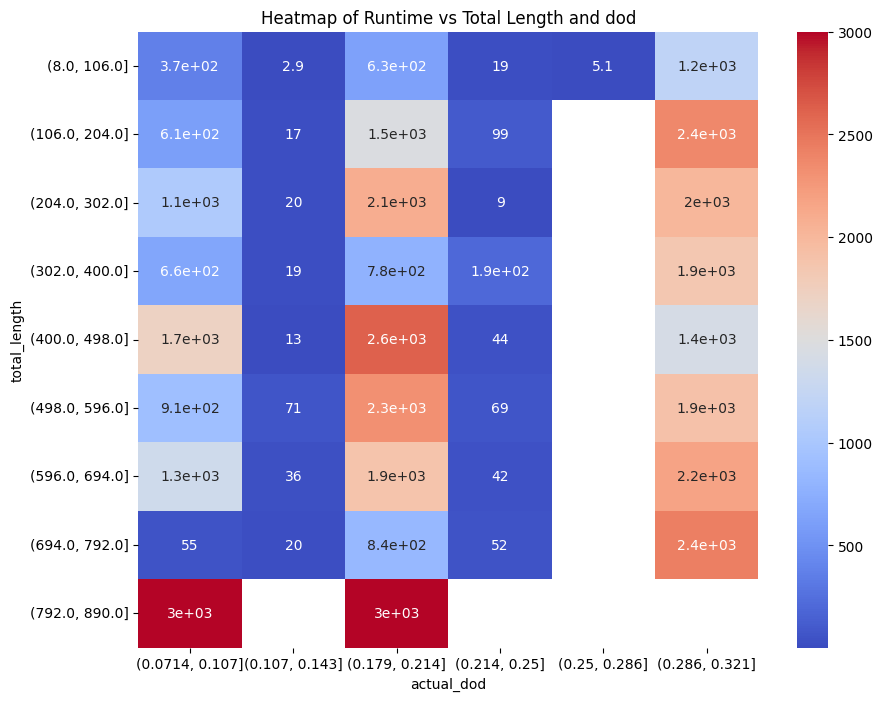

In [7]:
pivot_table = df.pivot_table(index=pd.cut(df['total_length'], np.linspace(df['total_length'].min(), df['total_length'].max(), 10)), 
                             columns=pd.cut(df['actual_dod'], np.linspace(df['actual_dod'].min(), df['actual_dod'].max(), 10)), 
                             values='runtime', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Runtime vs Total Length and dod')
plt.show()

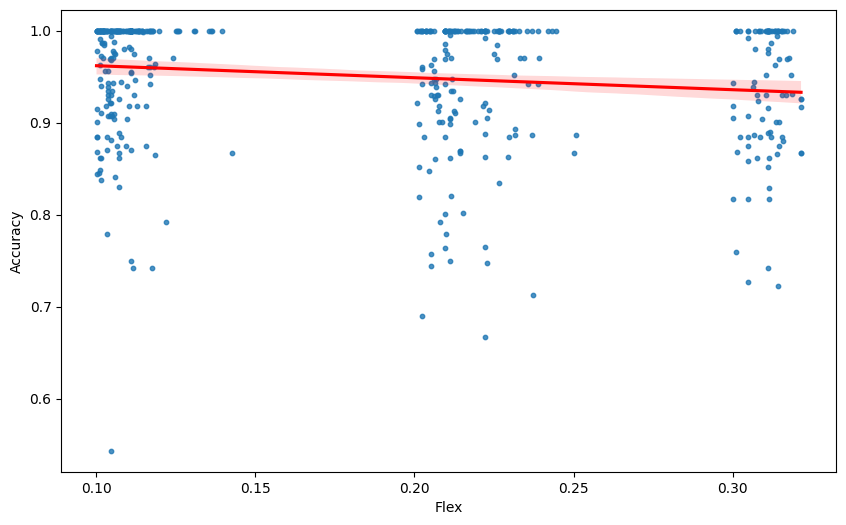

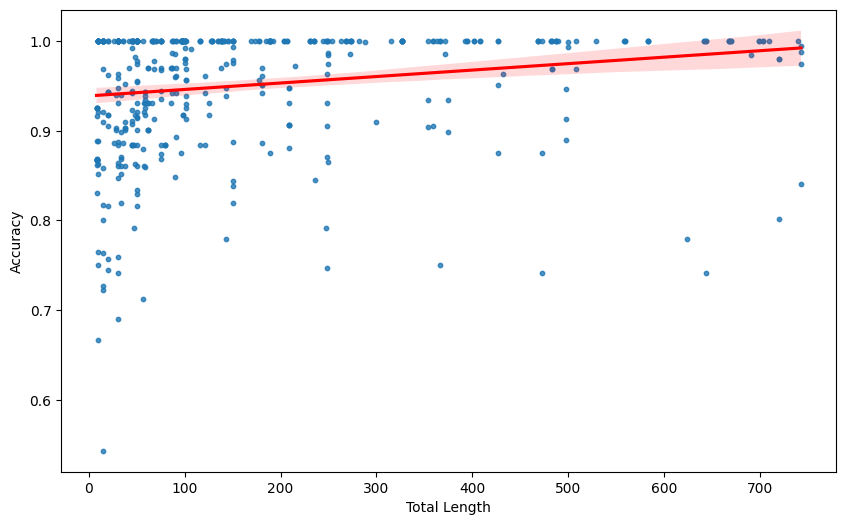

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='actual_dod', y='accuracy', data=polocm_success_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Flex')
plt.ylabel('Accuracy')
plt.show()

# You can do the same for total_length
plt.figure(figsize=(10, 6))
sns.regplot(x='total_length', y='accuracy', data=polocm_success_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Total Length')
plt.ylabel('Accuracy')
plt.show()



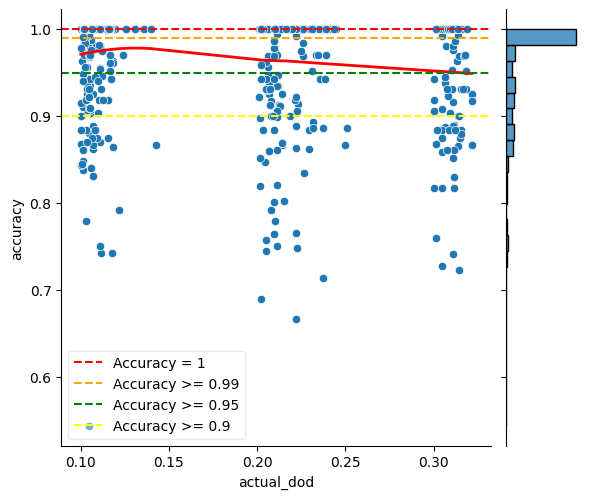

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the joint plot without the marginal x-axis bars
g = sns.jointplot(x='actual_dod', y='accuracy', data=polocm_success_df, kind='scatter', marginal_kws={'bins': 25, 'fill': True})

# Remove x-axis marginal plot
g.ax_marg_x.set_visible(False)

# Add regression line to show the trend
sns.regplot(x='actual_dod', y='accuracy', data=polocm_success_df, lowess=True, scatter=False, ax=g.ax_joint, color='red', line_kws={'lw': 2})

# Change the color of y-axis marginal bars to match the scatter and lines
# for bar in g.ax_marg_y.patches:
#     bar.set_facecolor('blue')

# Add the horizontal lines back with accuracy thresholds
g.ax_joint.axhline(y=1, color='red', linestyle='--', label='Accuracy = 1')
g.ax_joint.axhline(y=0.99, color='orange', linestyle='--', label='Accuracy >= 0.99')
g.ax_joint.axhline(y=0.95, color='green', linestyle='--', label='Accuracy >= 0.95')
g.ax_joint.axhline(y=0.9, color='yellow', linestyle='--', label='Accuracy >= 0.9')

# Set the legend transparency (alpha)
legend = plt.legend(loc='lower left', framealpha=0.4)  # Adjust the transparency with framealpha
plt.show()


/tmp/ipykernel_618335/4145096197.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = polocm_success_df.pivot_table(index=pd.cut(polocm_success_df['total_length'], np.linspace(polocm_success_df['total_length'].min(), polocm_success_df['total_length'].max(), 10)),


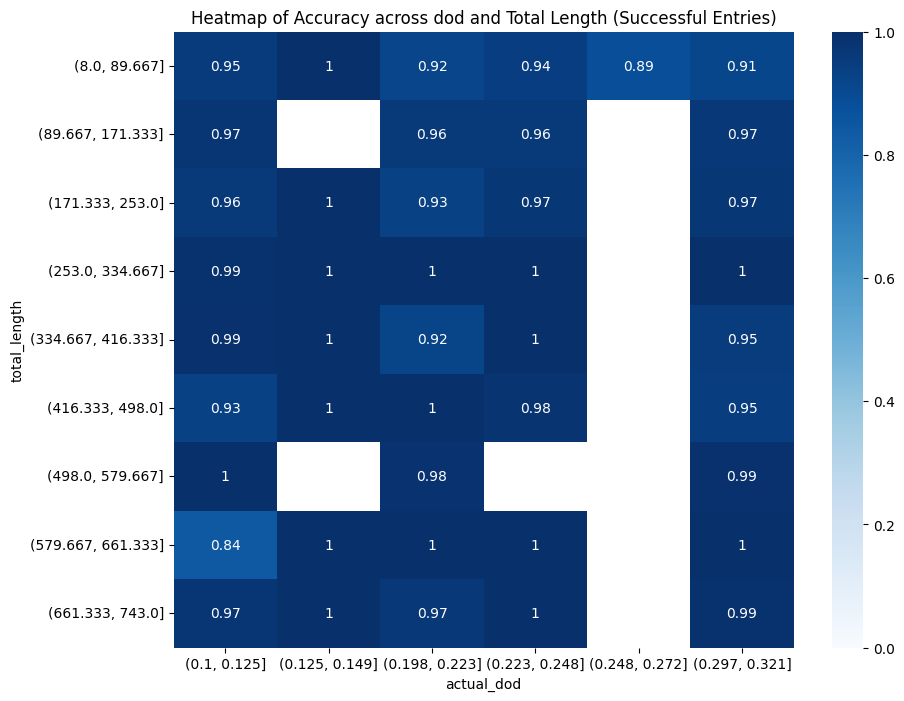

In [10]:
# Create a pivot table for the heatmap
pivot_table = polocm_success_df.pivot_table(index=pd.cut(polocm_success_df['total_length'], np.linspace(polocm_success_df['total_length'].min(), polocm_success_df['total_length'].max(), 10)), 
                                        columns=pd.cut(polocm_success_df['actual_dod'], np.linspace(polocm_success_df['actual_dod'].min(), polocm_success_df['actual_dod'].max(), 10)), 
                                        values='accuracy', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Heatmap of Accuracy across dod and Total Length (Successful Entries)')
plt.show()

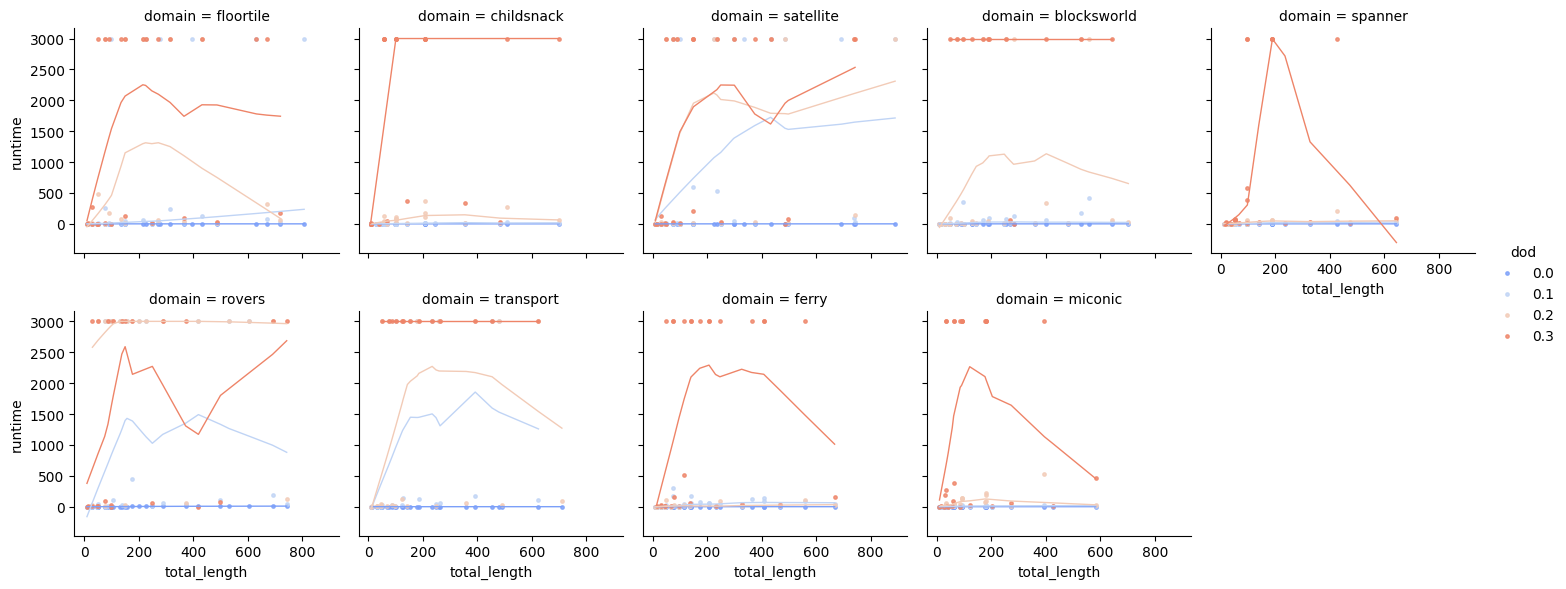

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the col_wrap to 5 to make 2 rows and 5 columns, and adjust the size of each plot
sns.lmplot(
    x="total_length", y="runtime", 
    hue="dod", col="domain", 
    data=df, col_wrap=5, aspect=1, height=3, 
    lowess=True, scatter_kws={'s':6}, line_kws={'lw':1}, palette='coolwarm'
)

# Show the plot
plt.show()


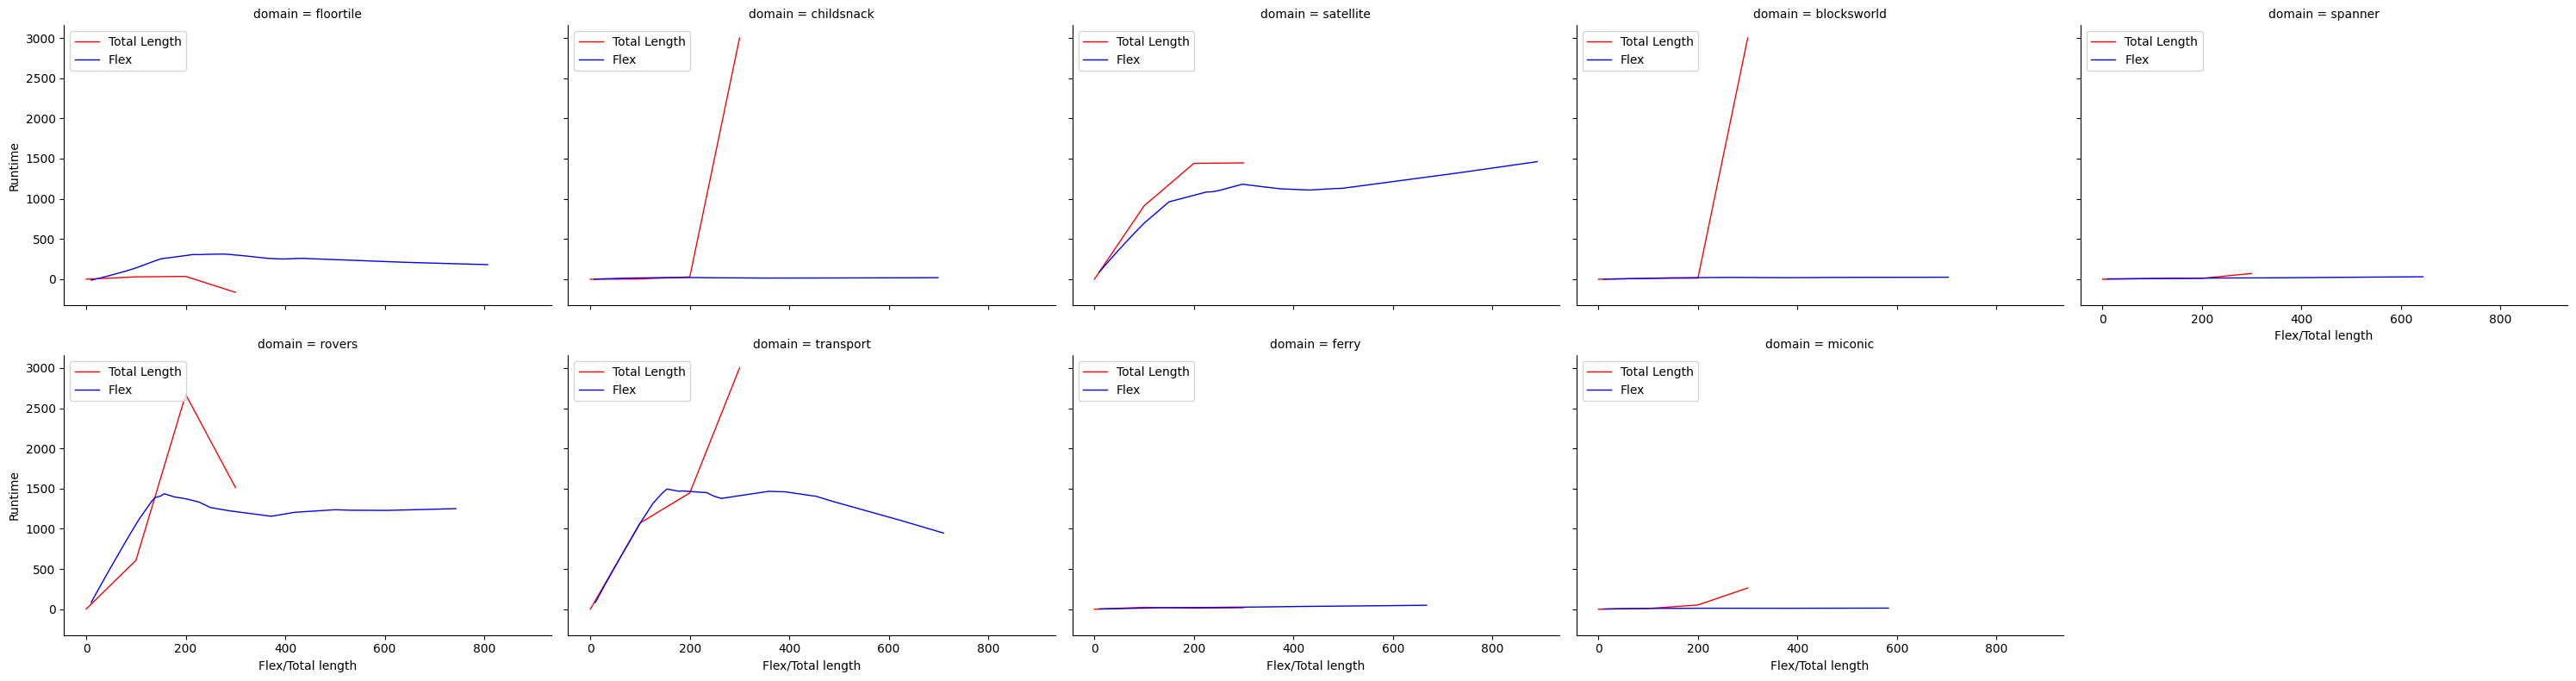

In [12]:

df['scaled_dod'] = df['dod'] * 1000
# Set up the facet grid to create a plot for each domain
g = sns.FacetGrid(df, col="domain", col_wrap=5, height=4, aspect=1.5)

# Second line for scaled_dod vs runtime with LOWESS smoothing
g.map_dataframe(sns.regplot, x="scaled_dod", y="runtime", line_kws={'color':'red', 'lw':1}, scatter=False, lowess=True)

# First line for total_length vs runtime with LOWESS smoothing
g.map_dataframe(sns.regplot, x="total_length", y="runtime", line_kws={'color':'blue', 'lw':1}, scatter=False, lowess=True)



# Customize the legend and labels
for ax in g.axes.flat:
    ax.legend(["Total Length", "Flex"], loc="upper left")

g.set_axis_labels("Flex/Total length", "Runtime")
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

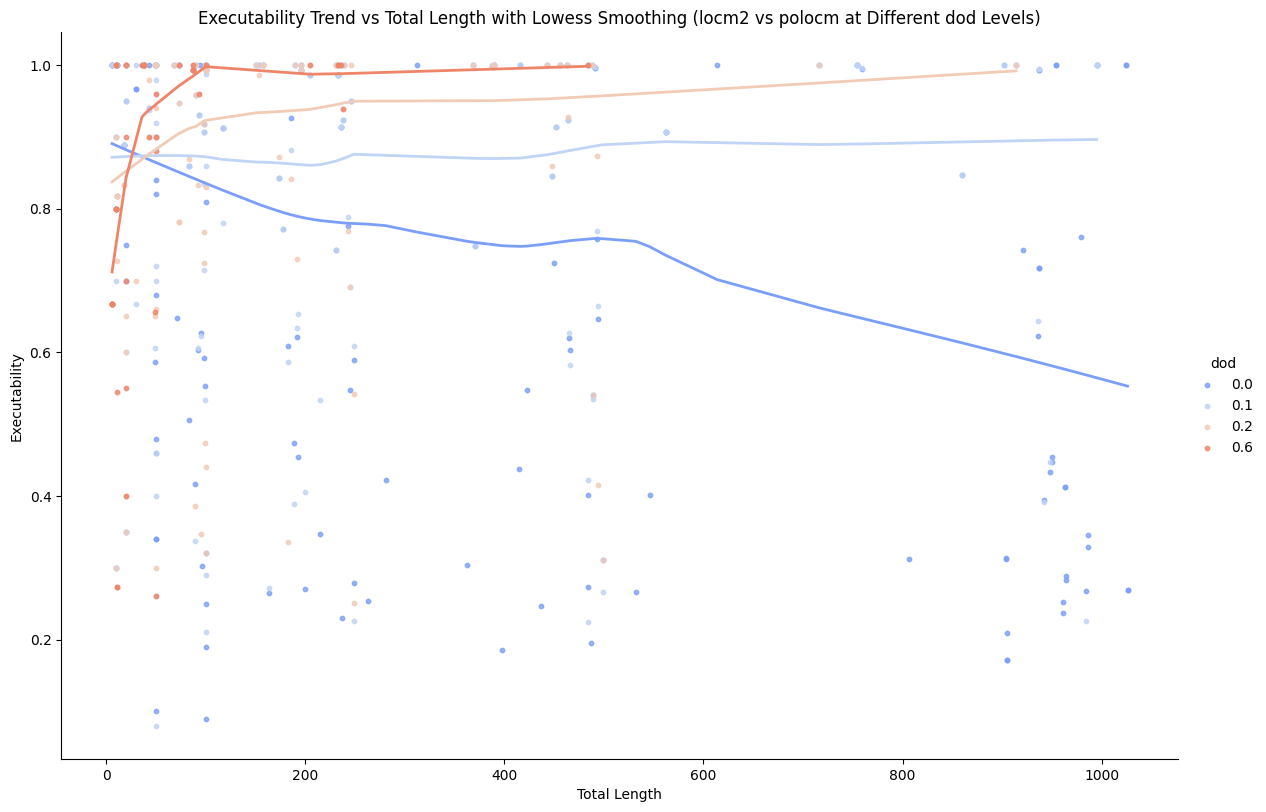

In [6]:


plt.figure(figsize=(12, 8))

# Apply lowess smoothing for each dod value
sns.lmplot(x='total_length', y='executability', hue='dod', data=success_df, height=8, aspect=1.5, lowess=True, scatter_kws={'s':10}, line_kws={'lw':2}, palette='coolwarm')

plt.title('Executability Trend vs Total Length with Lowess Smoothing (locm2 vs polocm at Different dod Levels)')
plt.xlabel('Total Length')
plt.ylabel('Executability')
plt.show()





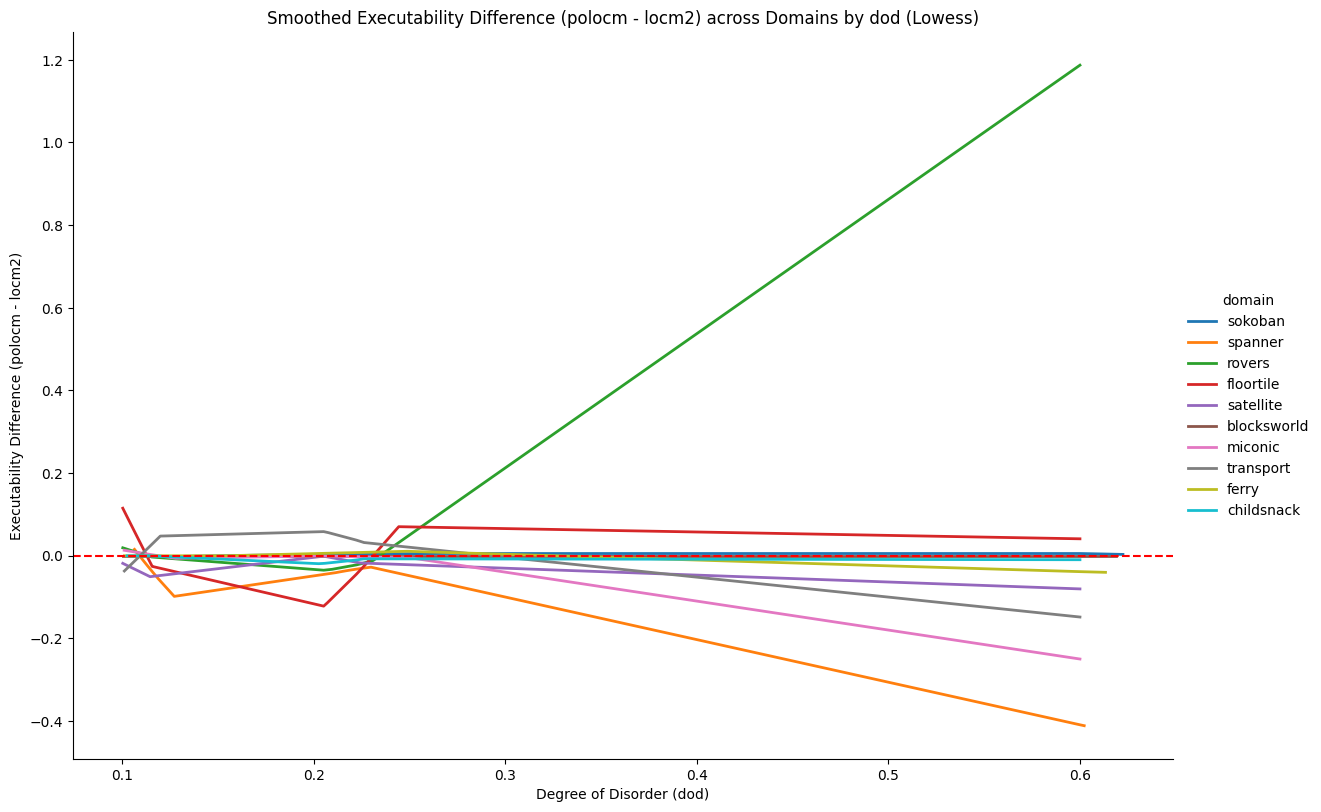

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the DataFrame for successful results only
df_success = df[df['result'] == "Success"].copy()

# Step 2: Split the data into locm2 and polocm tables
df_locm2 = df_success[df_success['dod'] == 0]
df_polocm = df_success[df_success['dod'] > 0]

# Step 3: Merge locm2 and polocm on 'domain' to compare executability
df_merged = pd.merge(df_polocm, df_locm2, on=['domain', 'lo_id'], suffixes=('_polocm', '_locm2'))

# Step 4: Calculate the difference in executability (polocm - locm2)
df_merged['executability_diff'] = df_merged['executability_polocm'] - df_merged['executability_locm2']

# Step 5: Use lmplot with lowess for smoothing
sns.lmplot(x='actual_dod_polocm', y='executability_diff', hue='domain', data=df_merged, height=8, aspect=1.5, scatter=False,
           lowess=True, line_kws={'lw': 2}, palette='tab10')

# Step 6: Add title and axis labels
plt.title('Smoothed Executability Difference (polocm - locm2) across Domains by dod (Lowess)')
plt.xlabel('Degree of Disorder (dod)')
plt.ylabel('Executability Difference (polocm - locm2)')
plt.axhline(0, color='red', linestyle='--', label='locm2 Baseline')
plt.show()


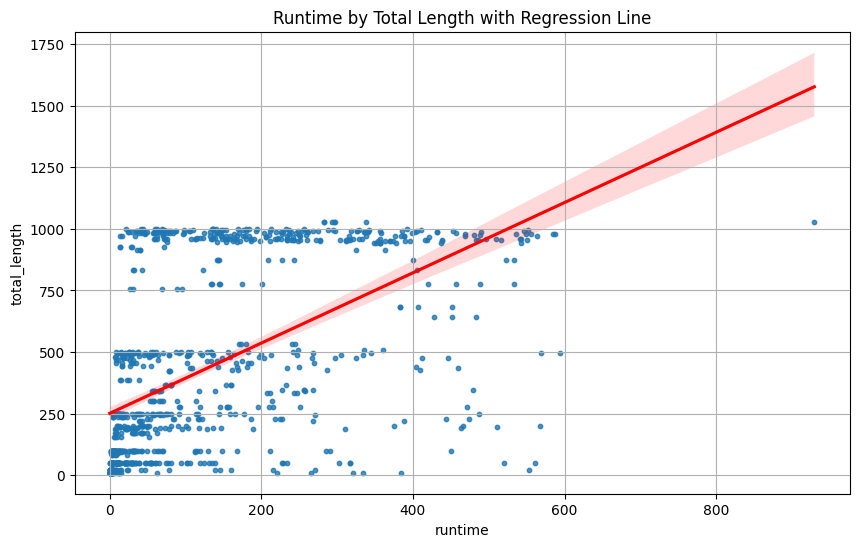

In [11]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='runtime', y='total_length', scatter_kws={'s': 10}, line_kws={"color": "red"})

# Titles and labels
plt.title('Runtime by Total Length with Regression Line')
plt.xlabel('runtime')
plt.ylabel('total_length')


plt.grid(True)
plt.show()

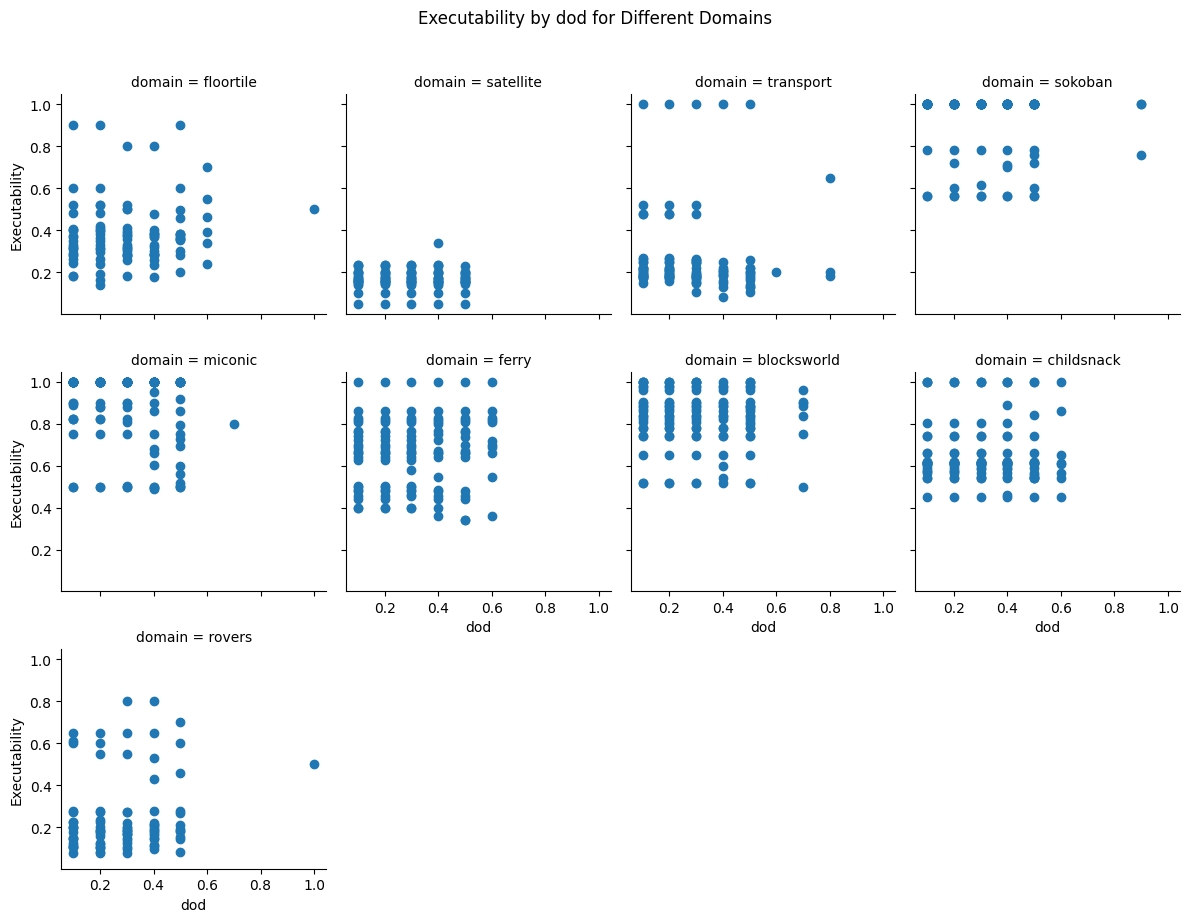

In [12]:
# Step 2: Create a faceted plot, where each subplot corresponds to one domain
g = sns.FacetGrid(data, col='domain', col_wrap=4, height=3)
g = g.map(plt.scatter, 'dod', 'executability', marker='o')

# Step 3: Add titles and adjust the layout
g.fig.suptitle('Executability by dod for Different Domains', y=1.02)
g.set_axis_labels('dod', 'Executability')

plt.tight_layout()
plt.show()

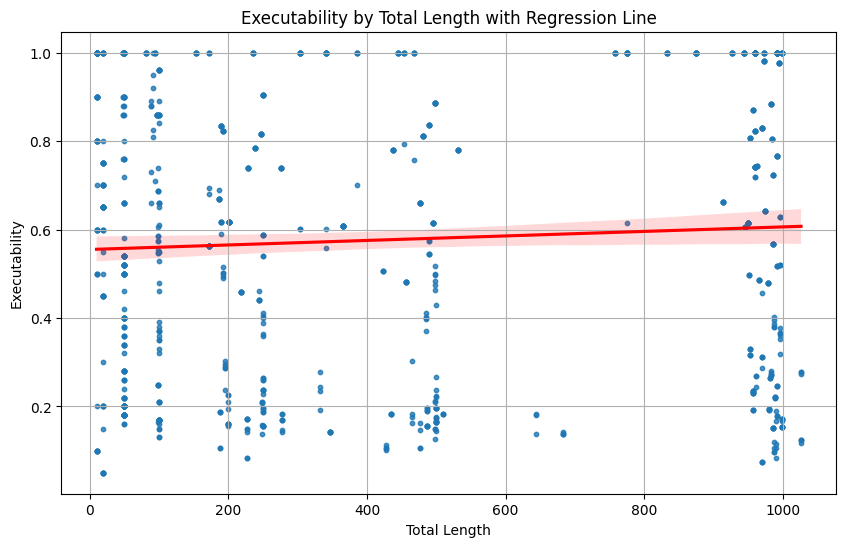

In [13]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='total_length', y='executability', scatter_kws={'s': 10}, line_kws={"color": "red"})

# Titles and labels
plt.title('Executability by Total Length with Regression Line')
plt.xlabel('Total Length')
plt.ylabel('Executability')


plt.grid(True)
plt.show()